In [18]:
from cadd.preprocess import DataLoader, calc_pIC50
from cadd.ADME.lipinski import LipinskiCalc
from cadd.ADME.pains import PAINS
from cadd.ADME.unwanted import UnwantedSubs
import pandas as pd

### Load data from CMEMBL

In [ ]:
dl = DataLoader(target = 'CHEMBL1825', bioactivity_type='IC50', assay_type = 'B', target_organism = 'Homo sapiens')
data = dl.get_data()
pic50 = calc_pIC50(data)
data.insert(loc = 3, column='pIC50', value = pic50)

### Load data from file

In [2]:
data = pd.read_csv('data.csv')
data.head()

,molecule_chembl_id,smiles,standard_units,pIC50,standard_value,type,units,value
0,CHEMBL3326305,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23,nM,4.374,42300.0,IC50,uM,42.3
1,CHEMBL3326315,O=C1Sc2c(S(=O)(=O)Nc3ccc(O)cc3)cc(S(=O)(=O)Nc3...,nM,4.854,14000.0,IC50,uM,14.0
2,CHEMBL3356478,O=S(=O)(Nc1cc(Cl)c(O)c(Cl)c1)c1ccc2ccccc2c1,nM,4.000,100000.0,IC50,uM,100.0
3,CHEMBL3314616,O=S(=O)(Nc1ccc(O)c(Cl)c1)c1ccc(F)cc1,nM,4.000,100000.0,IC50,uM,100.0
4,CHEMBL3326318,Cc1cc2occ(CN(C)CCN(C)Cc3cn(-c4cccc(C(F)(F)F)c4...,nM,4.693,20300.0,IC50,uM,20.3


### Lipinski Filter

In [3]:
smiles = list(data['smiles'])
a = LipinskiCalc(smiles)

In [4]:
data = a.lipinski_table
data

,Smile,Molecular_weight,Acceptors,Donors,LogP,Fulfill
0,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23,374.012806,4,3,3.56530,True
1,O=C1Sc2c(S(=O)(=O)Nc3ccc(O)cc3)cc(S(=O)(=O)Nc3...,528.011964,8,4,4.09850,False
2,O=S(=O)(Nc1cc(Cl)c(O)c(Cl)c1)c1ccc2ccccc2c1,366.983670,3,2,4.65300,True
3,O=S(=O)(Nc1ccc(O)c(Cl)c1)c1ccc(F)cc1,300.997570,3,2,2.98550,True
4,Cc1cc2occ(CN(C)CCN(C)Cc3cn(-c4cccc(C(F)(F)F)c4...,583.221340,5,0,7.35814,False
...,...,...,...,...,...,...
456,Cc1nc(Nc2cnc3ccccc3c2)c(C)c(C)c1O,279.137162,4,2,4.00426,True
457,Cc1nc(Nc2ccc(Cl)nc2)c(C)c(C)c1O,263.082540,4,2,3.50446,True
458,O=C(NCCN1CCOCC1)c1ccc2c(c1)C(=O)c1ccc(Nc3ccc(F...,592.248584,6,3,5.21320,False
459,Nc1c(C(=O)NCc2ccc(C(=O)NCCCC3CCCCC3)cc2)cnn1-c...,459.263425,5,3,4.47480,True


In [5]:
data_fulfilled = data.query('Fulfill == True')
data_fulfilled

,Smile,Molecular_weight,Acceptors,Donors,LogP,Fulfill
0,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23,374.012806,4,3,3.56530,True
2,O=S(=O)(Nc1cc(Cl)c(O)c(Cl)c1)c1ccc2ccccc2c1,366.983670,3,2,4.65300,True
3,O=S(=O)(Nc1ccc(O)c(Cl)c1)c1ccc(F)cc1,300.997570,3,2,2.98550,True
5,O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23,374.012806,4,3,3.56530,True
12,Nc1cccc(-n2cc(C(=O)N3CCN(C(=O)c4coc5ccccc5c4=O...,492.179755,6,1,3.91730,True
...,...,...,...,...,...,...
455,Nc1ccc(O)c(C(=O)O)c1,153.042593,3,3,0.67260,True
456,Cc1nc(Nc2cnc3ccccc3c2)c(C)c(C)c1O,279.137162,4,2,4.00426,True
457,Cc1nc(Nc2ccc(Cl)nc2)c(C)c(C)c1O,263.082540,4,2,3.50446,True
459,Nc1c(C(=O)NCc2ccc(C(=O)NCCCC3CCCCC3)cc2)cnn1-c...,459.263425,5,3,4.47480,True


### Draw Lipinski radar plot

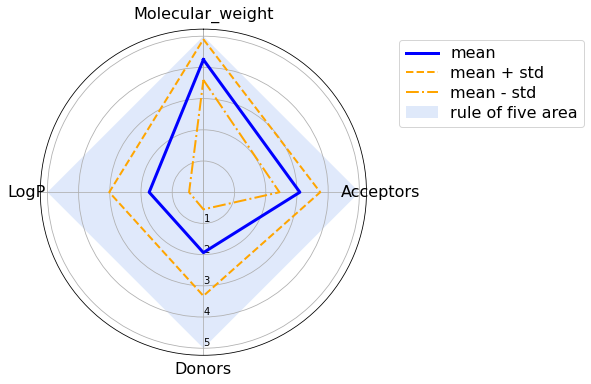

In [6]:
a.visualize(data_fulfilled)

### Filter PAINS

In [16]:
p = PAINS(list(data_fulfilled['Smile']))

In [17]:
p.get_pains()[0]

{'smiles': 'O=C1Nc2ccc(S(=O)(=O)Nc3ccc(O)c(Cl)c3)c3cccc1c23',
 'pains': 'sulfonamide_B(41)'}

In [9]:
no_pains = p.exclude()
no_pains[:5]

['Nc1cccc(-n2cc(C(=O)N3CCN(C(=O)c4coc5ccccc5c4=O)CC3)c3ccccc32)c1',
 'Nc1cccc(-n2cc(C(=O)N3CCN(C(=O)c4coc5ccccc5c4=O)CC3)c3ccccc32)c1',
 'COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3ccc(C(N)C(F)(F)F)cc3)NC(=O)NC1=O)C2',
 'COc1ccc2c(c1F)C(=O)N(C[C@@]1(C#Cc3ccc4c(=O)[nH][nH]c4c3)NC(=O)NC1=O)C2',
 'COc1ccc2c(c1)C(=O)N(C[C@@]1(C#Cc3cc(F)c4c(=O)[nH][nH]c4c3)NC(=O)NC1=O)C2']

### Unwaned filter

In [10]:
u = UnwantedSubs(no_pains)

In [11]:
unwanted, clean = u.get_unwanted()

In [14]:
unwanted[0]

{'smiles': 'Nc1cccc(-n2cc(C(=O)N3CCN(C(=O)c4coc5ccccc5c4=O)CC3)c3ccccc32)c1',
 'name': 'aniline',
 'smarts': 'c1cc([NH2])ccc1'}

In [13]:
print(f'Unwanted found: {len(unwanted)} \nclean: {len(clean)}')

Unwanted found: 341 
clean: 49


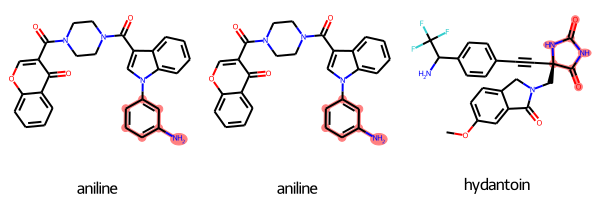

In [13]:
u.visualize(unwanted[:3])